In [1]:
import sys
import os
sys.path.append(os.path.abspath('../'))
from dynamo.seasonality_analysis import SeasonalityAnalysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
sns.set_style('whitegrid')
mpl.rcParams['figure.dpi'] = 100
plt.rcParams['legend.title_fontsize'] = 'large'
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1

In [3]:
wd =  './data/data_original/'

## I. Shannon diversity index

In [4]:
n=0
male_alpha_df = pd.read_csv(wd + 'alpha_diversity/shannon/male_shannon_entropy.csv').iloc[n:150]
female_alpha_df = pd.read_csv(wd + 'alpha_diversity/shannon/female_shannon_entropy.csv').iloc[n:150]
donorA_alpha_df = pd.read_csv(wd + 'alpha_diversity/shannon/donorA_shannon_entropy.csv').iloc[n:150]
donorB_alpha_df = pd.read_csv(wd + 'alpha_diversity/shannon/donorB_shannon_entropy.csv').iloc[n:150]

datasets = [male_alpha_df, female_alpha_df, donorA_alpha_df, donorB_alpha_df]#.iloc[:150]]
subjects = ['Male', 'Female', 'DonorA', 'DonorB']
s_analysis = SeasonalityAnalysis(subjects, datasets)


In [5]:
flatness_scores = s_analysis.calculate_flatness_scores('shannon_entropy')
flatness_scores

['Male: 0.6097536110391483',
 'Female: 0.4329171476148351',
 'DonorA: 0.6042211534659065',
 'DonorB: 0.5474553648404444']

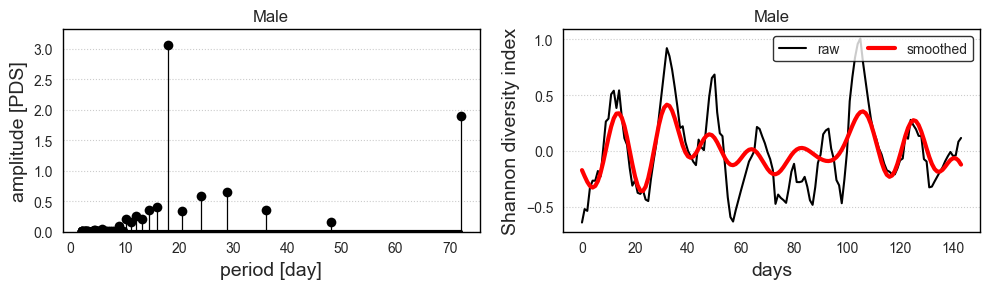

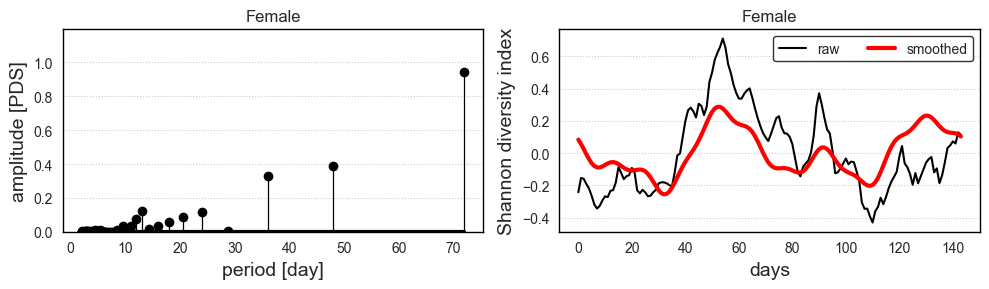

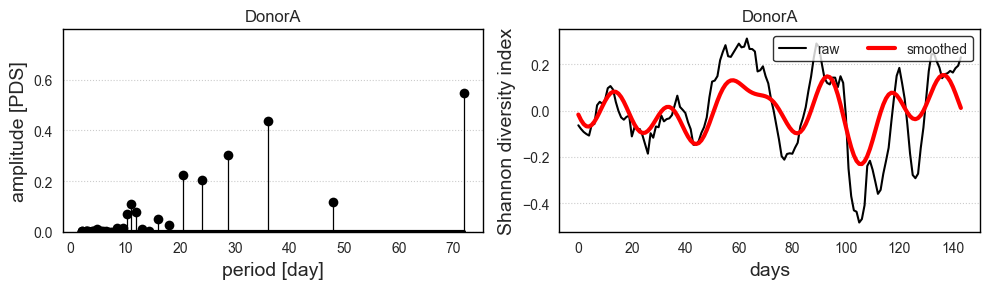

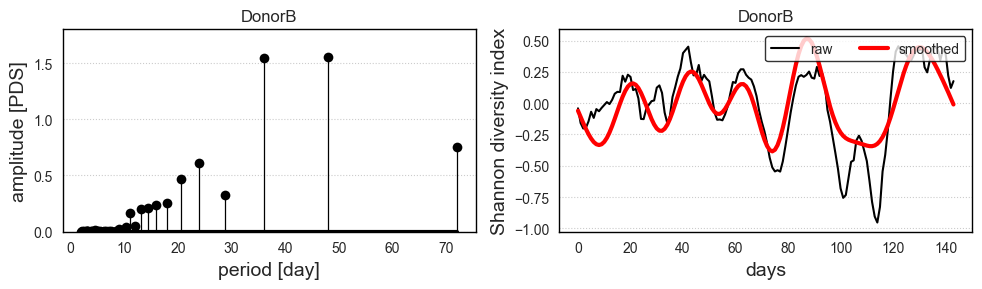

In [6]:
for dataset, subject in zip(s_analysis.datasets, s_analysis.subjects):
    s_analysis.plot_fft(dataset['shannon_entropy'], 5, subject, True)

In [7]:
reconstruction_scores = s_analysis.calculate_reconstruction_scores()
reconstruction_scores

,coeff,n_modes,subject
0,0.55,1,Male
1,0.70,2,Male
2,0.76,3,Male
3,0.71,4,Male
4,0.75,5,Male
5,0.78,6,Male
6,0.81,7,Male
7,0.85,8,Male
8,0.87,9,Male
9,0.88,10,Male


In [8]:
cmap = {
    'Male': '#d36135',
    'Female': '#ffb400',
    'DonorA': '#227c9d',
    'DonorB': '#7fb069'
}

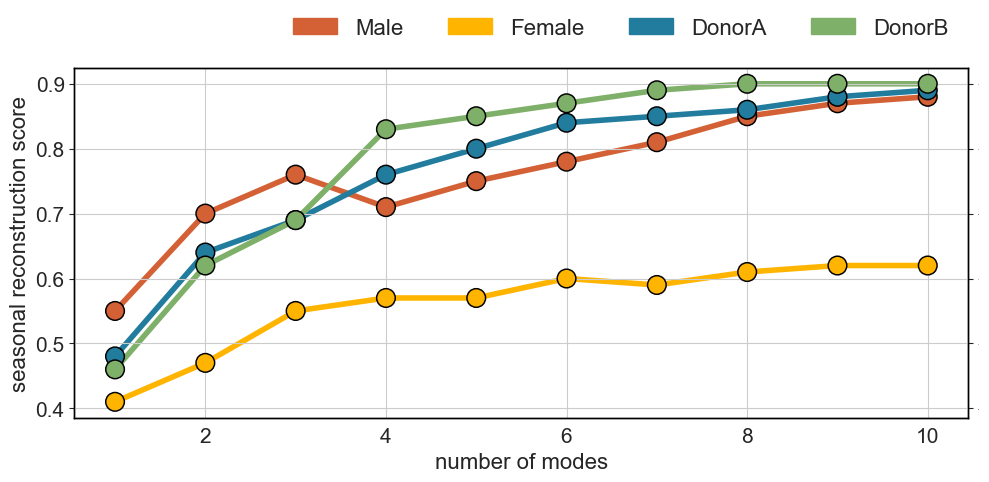

In [9]:
s_analysis.plot_n_modes_vs_coeff(reconstruction_scores, cmap)


# Faith's PD index

In [10]:
#faiths
wd =  './data/data_original/alpha_diversity/faiths_pd/'

male_alpha_df = pd.read_csv(wd + 'male_faiths_pd.csv').iloc[:150]
female_alpha_df = pd.read_csv(wd + 'female_faiths_pd.tsv', sep='\t', index_col = [0]).iloc[:150]
donorA_alpha_df = pd.read_csv(wd + 'donorA_faiths_pd.tsv', sep='\t', index_col = [0]).iloc[:150]
donorB_alpha_df = pd.read_csv(wd + 'donorB_faiths_pd.tsv', sep='\t', index_col = [0]).iloc[:150]

datasets = [male_alpha_df, female_alpha_df, donorA_alpha_df, donorB_alpha_df.iloc[:150]]
subjects = ['Male', 'Female', 'DonorA', 'DonorB']

In [11]:
s_analysis = SeasonalityAnalysis(subjects, datasets)

In [12]:
flatness_scores = s_analysis.calculate_flatness_scores('faith_pd')
flatness_scores

['Male: 0.6773554201001986',
 'Female: 0.45701011509899436',
 'DonorA: 0.5634496974902878',
 'DonorB: 0.5140777144231046']

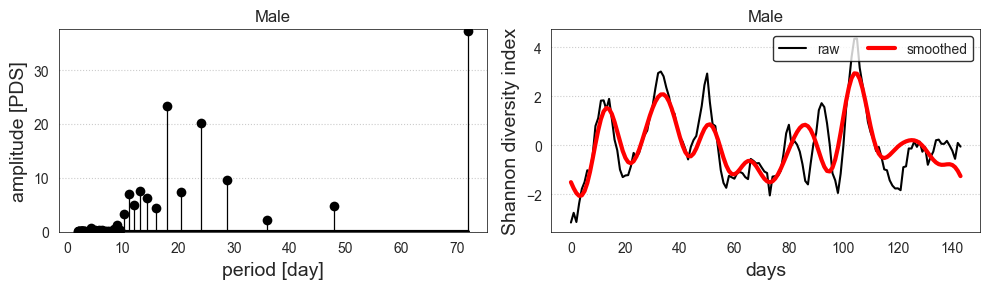

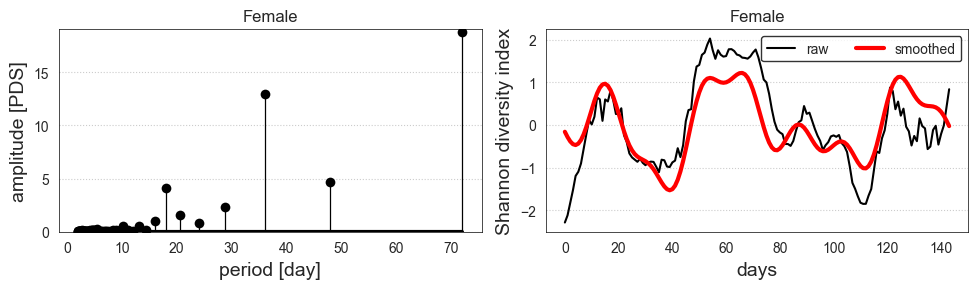

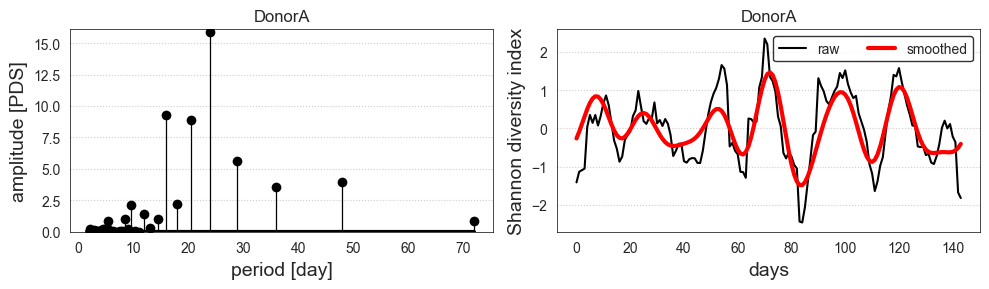

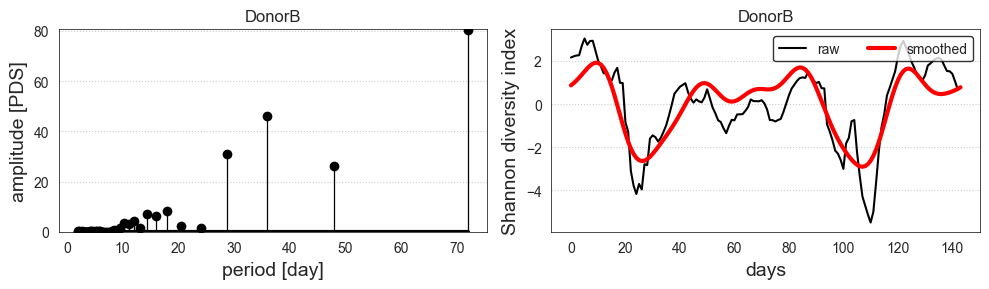

In [13]:
for dataset, subject in zip(s_analysis.datasets, s_analysis.subjects):
    s_analysis.plot_fft(dataset['faith_pd'], 5, subject, True)

In [14]:
reconstruction_scores = s_analysis.calculate_reconstruction_scores()
reconstruction_scores

,coeff,n_modes,subject
0,0.49,1,Male
1,0.56,2,Male
2,0.63,3,Male
3,0.67,4,Male
4,0.69,5,Male
5,0.73,6,Male
6,0.79,7,Male
7,0.83,8,Male
8,0.85,9,Male
9,0.87,10,Male


In [15]:
cmap = {
    'Male': '#d36135',
    'Female': '#ffb400',
    'DonorA': '#227c9d',
    'DonorB': '#7fb069'
}

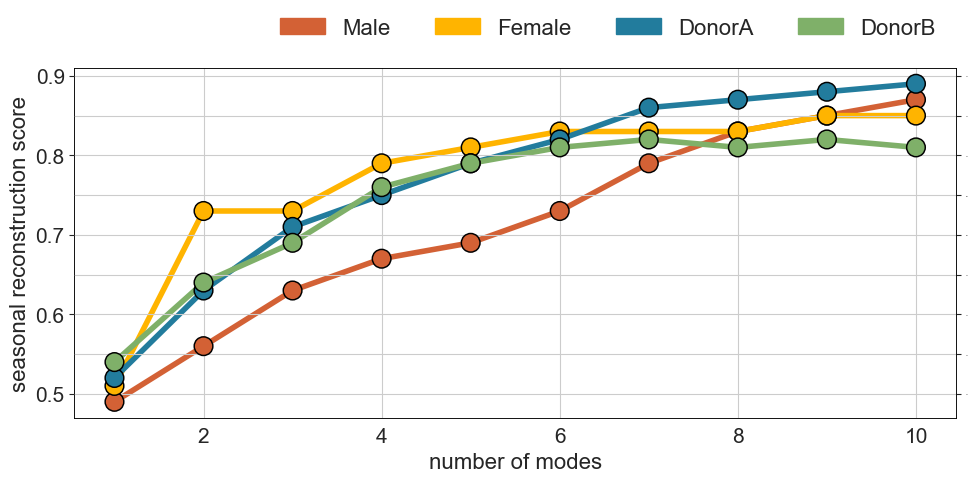

In [16]:
s_analysis.plot_n_modes_vs_coeff(reconstruction_scores, cmap)